In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
df = df.drop(['Cabin', 'Name'], axis=1)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df['Age'] = imp.fit_transform(df[['Age']])

In [12]:
for i in df['Pclass'].unique():
    for j in df['Sex'].unique():
        print("Average Age of " + str(j) + "s in Class " + str(i) + " is: ",np.round(np.mean(df[(df.Pclass == i) & (df.Sex == j)].Age)))  

Average Age of males in Class 3 is:  27.0
Average Age of females in Class 3 is:  24.0
Average Age of males in Class 1 is:  39.0
Average Age of females in Class 1 is:  34.0
Average Age of males in Class 2 is:  31.0
Average Age of females in Class 2 is:  29.0


In [13]:
for i in range(df.shape[0]):
    if np.isnan(df.Age[i]):
        df.Age[i] = np.round(np.mean(df[(df.Pclass == df.Pclass[i]) & (df.Sex == df.Sex[i])].Age))

In [14]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
5,6,0,3,male,28.0,0,0,330877,8.4583,Q
6,7,0,1,male,54.0,0,0,17463,51.8625,S
7,8,0,3,male,2.0,3,1,349909,21.0750,S
8,9,1,3,female,27.0,0,2,347742,11.1333,S
9,10,1,2,female,14.0,1,0,237736,30.0708,C


In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
df1 = df.dropna()
df1.shape

(889, 10)

In [17]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [19]:
P_class = pd.get_dummies(df1.Pclass, drop_first = True)
Gender = pd.get_dummies(df1.Sex, drop_first = True)
Embark = pd.get_dummies(df1.Embarked, drop_first = True)
df2 = pd.concat([df1, P_class, Gender, Embark], axis = 1)
df2.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,1,1,0,1
5,6,0,3,male,28.0,0,0,330877,8.4583,Q,0,1,1,1,0
6,7,0,1,male,54.0,0,0,17463,51.8625,S,0,0,1,0,1
7,8,0,3,male,2.0,3,1,349909,21.0750,S,0,1,1,0,1
8,9,1,3,female,27.0,0,2,347742,11.1333,S,0,1,0,0,1
9,10,1,2,female,14.0,1,0,237736,30.0708,C,1,0,0,0,0


In [20]:
df3 = df2.drop(['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Embarked'], axis = 1)
df3.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [21]:
test_size = 0.3
seed = 10
X_train, X_test, y_train, y_test = train_test_split(df3.drop('Survived', axis=1), df3['Survived'], test_size = test_size, random_state = seed, stratify = df3['Survived'])

In [22]:
model = LogisticRegression(random_state = 10, class_weight='balanced', max_iter = 1000)
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=10)

In [23]:
model.predict_proba(X_test)

array([[0.29183026, 0.70816974],
       [0.85828505, 0.14171495],
       [0.62626903, 0.37373097],
       [0.85448618, 0.14551382],
       [0.51059822, 0.48940178],
       [0.31329175, 0.68670825],
       [0.86044481, 0.13955519],
       [0.85356611, 0.14643389],
       [0.20819027, 0.79180973],
       [0.91112675, 0.08887325],
       [0.88669475, 0.11330525],
       [0.9370114 , 0.0629886 ],
       [0.82747096, 0.17252904],
       [0.07635643, 0.92364357],
       [0.39000047, 0.60999953],
       [0.85362596, 0.14637404],
       [0.84862801, 0.15137199],
       [0.25621342, 0.74378658],
       [0.63131265, 0.36868735],
       [0.27366811, 0.72633189],
       [0.02896741, 0.97103259],
       [0.1434097 , 0.8565903 ],
       [0.69661701, 0.30338299],
       [0.49811453, 0.50188547],
       [0.85857605, 0.14142395],
       [0.58782981, 0.41217019],
       [0.63535322, 0.36464678],
       [0.06737652, 0.93262348],
       [0.7484718 , 0.2515282 ],
       [0.14849031, 0.85150969],
       [0.

In [24]:
model.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [25]:
print('classes: ',model.classes_)
print('coefficients: ',model.coef_)
print('intercept :',model.intercept_)

classes:  [0 1]
coefficients:  [[-0.0390081  -0.32744119  0.08578575  0.00478904 -0.70418164 -1.92634252
  -2.55186388 -0.44507645 -0.48054255]]
intercept : [4.21130541]


In [26]:
pred1 = model.predict(X_test)

In [27]:
con_mat1 = confusion_matrix(y_test, pred1 )
print(con_mat1)

[[127  38]
 [ 27  75]]


In [28]:
pred = model.predict(X_test)
labels = [1, 0]
con_mat = confusion_matrix(y_test, pred, labels = labels )
print(con_mat)

[[ 75  27]
 [ 38 127]]


In [29]:
print(model.score(X_test, y_test))

0.7565543071161048


In [30]:
model_2=LogisticRegression(class_weight = {0:0.81, 1:1.31})
model_2.fit(X_train,y_train)
model_2.score(X_test, y_test)

c:\users\sgove\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7565543071161048

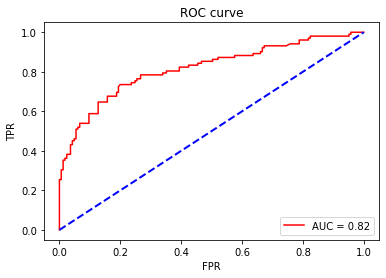

In [31]:
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probs = model_2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [32]:
roc_auc_score(y_test, preds)

0.8167260843731432

In [33]:
actual = y_test
predicted = pred
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       165
           1       0.66      0.74      0.70       102

    accuracy                           0.76       267
   macro avg       0.74      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



In [ ]:
help(LogisticRegression)